In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [29]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

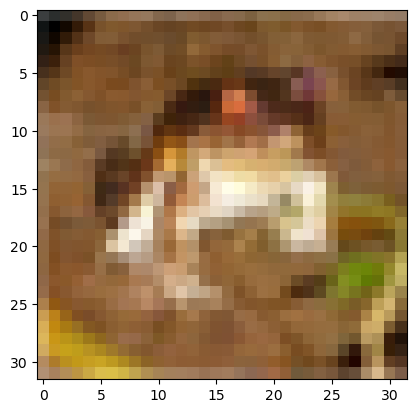

In [4]:
plt.imshow(X_train[0])

In [30]:
yt = y_train.copy()
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "frog", "horse", "ship", "truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

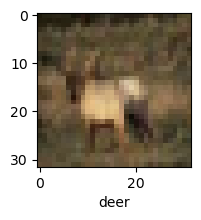

In [10]:
plot_sample(X_train, y_train, 3)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

c:\Users\saura\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 72ms/step - accuracy: 0.3008 - loss: 1.9330
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.4179 - loss: 1.6436
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 52ms/step - accuracy: 0.4546 - loss: 1.5489
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.4739 - loss: 1.4951
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 54ms/step - accuracy: 0.4950 - loss: 1.4379


In [13]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4899 - loss: 1.4579


[1.4622851610183716, 0.48510000109672546]

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.51      0.62      0.56      1000
           1       0.64      0.62      0.63      1000
           2       0.41      0.26      0.32      1000
           3       0.32      0.48      0.38      1000
           4       0.44      0.40      0.42      1000
           5       0.58      0.12      0.21      1000
           6       0.39      0.75      0.51      1000
           7       0.63      0.43      0.51      1000
           8       0.65      0.60      0.62      1000
           9       0.57      0.57      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.47     10000
weighted avg       0.51      0.49      0.47     10000



In [43]:
cnn = models.Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [44]:
cnn.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [45]:
yt[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [46]:
cnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.2628 - loss: 3.6439 - val_accuracy: 0.4810 - val_loss: 1.4446
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5082 - loss: 1.3787 - val_accuracy: 0.5592 - val_loss: 1.2363
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5808 - loss: 1.1907 - val_accuracy: 0.5652 - val_loss: 1.2468
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6293 - loss: 1.0712 - val_accuracy: 0.5989 - val_loss: 1.1527
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6560 - loss: 0.9885 - val_accuracy: 0.6177 - val_loss: 1.1326


In [47]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6279 - loss: 1.1225


[1.1326361894607544, 0.6176999807357788]

In [49]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

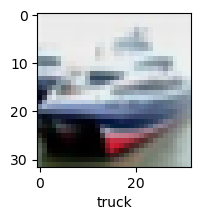

In [50]:
plot_sample(X_test, y_test, 1)

In [51]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[6.24690950e-03, 4.21842141e-03, 4.20830771e-02, 6.01892591e-01,
        2.90359091e-03, 2.02162698e-01, 1.21645652e-01, 5.32570994e-04,
        1.64266266e-02, 1.88785279e-03],
       [5.72739169e-04, 1.14066771e-03, 9.70222800e-07, 5.64233801e-07,
        8.94953178e-09, 6.82455621e-08, 6.73705074e-08, 5.49981438e-09,
        9.98272657e-01, 1.21670864e-05],
       [4.40227121e-01, 1.20201714e-01, 1.88903715e-02, 1.07788453e-02,
        3.22974706e-03, 4.89326660e-03, 4.52198368e-03, 3.21158543e-02,
        3.29641104e-01, 3.55000086e-02],
       [1.21646658e-01, 1.13239763e-02, 1.60991140e-02, 4.80040535e-03,
        1.96009059e-03, 1.89258961e-03, 4.76766331e-03, 1.48559979e-03,
        8.32780838e-01, 3.24306963e-03],
       [3.51114827e-03, 7.24921760e-04, 1.66994959e-01, 1.66212618e-01,
        5.39891601e-01, 5.04641160e-02, 6.78247958e-02, 2.76870490e-03,
        1.43817673e-03, 1.68885890e-04]], dtype=float32)